# Random Forest Tutorial

Загрузим датасет http://archive.ics.uci.edu/ml/datasets/BlogFeedback

## Считывание и подготовка данных

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
train = pd.read_csv('./BlogFeedback/blogData_train.csv', header=None)
print('Data size:', train.shape)
train.iloc[:, :16].head()

Data size: (52397, 281)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566


In [19]:
y = train.iloc[:, train.shape[1]-1].values
X = train.iloc[:, 0:train.shape[1]-2].values
print(X.shape)
print(y.shape)

(52397, 279)
(52397,)


In [20]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9, random_state=1543)

## Сходимость моделей

In [21]:
from sklearn.metrics import mean_squared_error as mse

def get_mse_list(X, y, clf, print_train=True):
    predictions = list()
    mses = list()
    for i, tree in enumerate(clf.estimators_):
        predictions.append(tree.predict(X))
        rf_prediction = mean(predictions, axis=0)
        mses.append(mse(y, rf_prediction))
    if print_train:
        print('Last score', mses[-1])
    return mses

In [23]:
def plot_mse_graph(clf, X_train, X_test, y_train, y_test, prefix, print_train=True):
    clf.fit(X_train, y_train)
    train_mses = get_mse_list(X_train, y_train, clf, False)
    test_mses = get_mse_list(X_test, y_test, clf)
    if print_train:
        plot(train_mses, label=prefix + ' train set error')
    plot(test_mses, label=prefix + ' test set error')
    xlabel('n_estimators')
    ylabel('MSE')
    legend()
    plt.grid(True)


Last score 706.6649618644115
Last score 862.9964214894443
CPU times: user 12.5 s, sys: 327 ms, total: 12.8 s
Wall time: 6.53 s


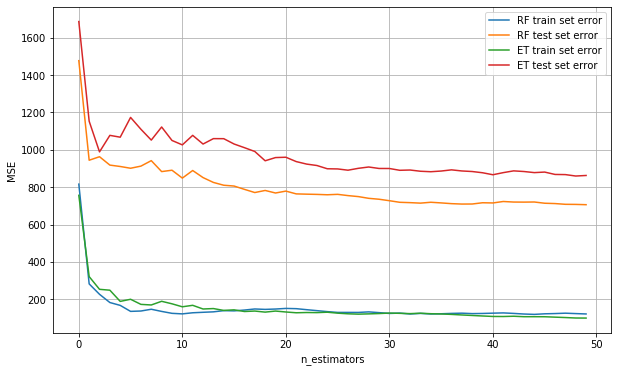

In [24]:
%%time
n_estimators = 50
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
figure(figsize=(10.0, 6.0))
plot_mse_graph(RandomForestRegressor(n_estimators=n_estimators, n_jobs=3),
               X_train, X_test, y_train, y_test,
               prefix='RF')
plot_mse_graph(ExtraTreesRegressor(n_estimators=n_estimators, n_jobs=3, bootstrap=True),
               X_train, X_test, y_train, y_test,
               prefix='ET')

## Важности признаков

1.0


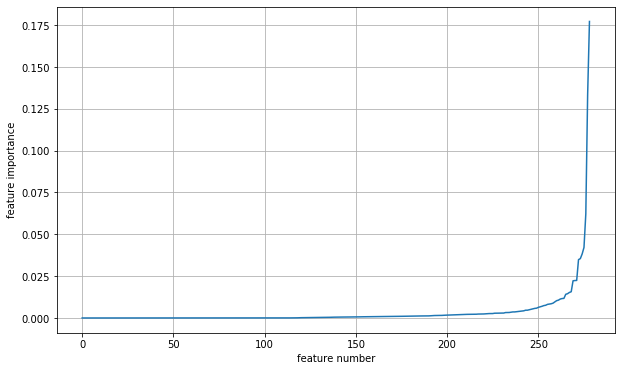

In [26]:
importances = RandomForestRegressor(n_estimators=n_estimators, n_jobs=3).fit(X_train, y_train).feature_importances_
figure(figsize=(10.0, 6.0))
plot(sorted(importances))
print(sum(importances))
xlabel('feature number')
ylabel('feature importance')
plt.grid(True)

## Out-of-bag score

In [27]:
predicted = RandomForestRegressor(n_estimators=n_estimators, n_jobs=3, oob_score=True).fit(X_train, y_train).oob_prediction_
print(mse(y_train, predicted))

758.3662676051063



## Выбор оптимального размера подмножеств признаков, используемого для построения случайного леса

Last score 940.9936528183413
Last score 950.743818873412
Last score 841.5762825577556
Last score 865.8737465649282
Last score 831.6754359076651
Last score 866.4733734717666
Last score 853.7890777650586
Last score 844.9271236985978
Last score 816.4153059501743
Last score 809.7942894448403
Last score 835.7474125321974
Last score 785.4468755673771
Last score 777.7680442616829
Last score 746.3597994772505
Last score 787.2033467266069


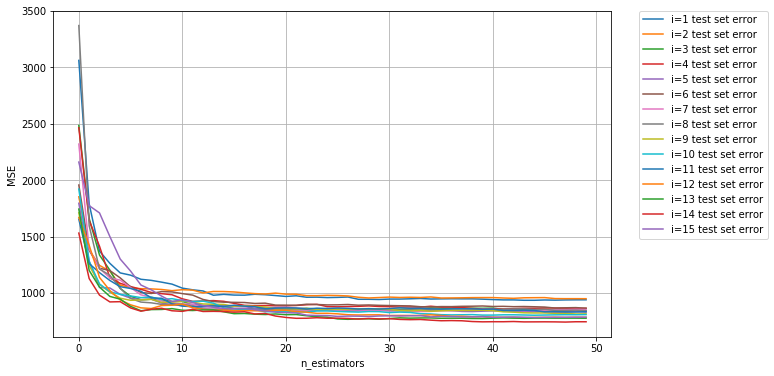

In [28]:
figure(figsize=(10.0, 6.0))

for i in range(1, 16):
    plot_mse_graph(RandomForestRegressor(n_estimators=n_estimators, n_jobs=3, max_features=i),
        X_train, X_test, y_train, y_test,
        prefix='i=' + str(i),
        print_train=False)
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)